<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2021/%EA%B8%B0%EB%A7%90%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%9D%B4%EA%B0%80%EC%9D%80%26%EA%B9%80%EC%83%81%EB%AF%BC/v0_1_%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC%EA%B8%B0%EB%A7%90_211107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 2학기 영상처리 기말프로젝트
### Image segmentation
--- 
* 201937437 이가은
* 2017      김상민

# 1. Libraries import

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import os
from tensorflow.keras import layers

# 2. Image load

In [92]:
# 1. 그림 불러오기
path = '/content/drive/MyDrive/가은/2021/영상처리/images'
origianl = os.path.join(path,'18-40-02-02 (SLA).jpg')
label = os.path.join(path,'18-40-02-02 (SLA)_re_image.png')

# 2. 그림 color 로 읽기
original_img  = cv2.imread(origianl,cv2.IMREAD_COLOR )
lable_img = cv2.imread(label,cv2.IMREAD_COLOR )

(1200, 1600, 3)
(1200, 1600, 3)


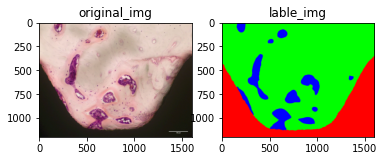

In [93]:
# 3. 이미지 불러오기
plt.figure()
plt.subplot(121), plt.imshow(original_img[:,:,::-1]), plt.title("original_img")
plt.subplot(122), plt.imshow(lable_img[:,:,::-1]), plt.title("lable_img")

print(original_img.shape)
print(lable_img.shape)

# 3. Various Image Augmentation

### 1) Random Rotation Augmentation

In [94]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

def rotation(orinigal, label):
    # load the image
    Rotation_original = original_img.copy()
    Rotation_label = lable_img.copy()

    # convert to numpy array
    data = img_to_array(Rotation_original)
    data1 = img_to_array(Rotation_label)

    # expand dimension to one sample
    samples = expand_dims(data, 0)
    samples1 = expand_dims(data1, 0)

    # create image data augmentation generator
    datagen = ImageDataGenerator(rotation_range=90)
    datagen1 = ImageDataGenerator(rotation_range=90)

    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    it1 = datagen1.flow(samples1, batch_size=1)

    print("-------------------------Random Rotation-------------------------")
    
    plt.figure(figsize=(10, 10))
    # generate samples and plot
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        plt.title("Rotation origianl")
        plt.imshow(image[:,:,::-1])
    # show the figure
    print(image.shape)
    plt.show()
    
    
    plt.figure(figsize=(10, 10))
    # generate samples and plot
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch1 = it1.next()
        # convert to unsigned integers for viewing
        image1 = batch1[0].astype('uint8')
        # plot raw pixel data
        plt.title("Rotation label")
        plt.imshow(image1[:,:,::-1])
    # show the figure
    print(image1.shape)
    plt.show()

### 2) Random flips Augmentation

In [95]:
def flips(orinigal, label):
    # load the image
    flips_original = original_img.copy()
    flips_label = lable_img.copy()

    # convert to numpy array
    data = img_to_array(flips_original)
    data1 = img_to_array(flips_label)

    # expand dimension to one sample
    samples = expand_dims(data, 0)
    samples1 = expand_dims(data1, 0)
    
    # ImageDataGenerator flipping
    datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
    datagen1 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

    # iterator
    aug_iter = datagen.flow(samples, batch_size=1)
    aug_iter1 = datagen1.flow(samples1, batch_size=1)

    print("-------------------------Random flips-------------------------")

    plt.figure(figsize=(10, 10))
    # generate batch of images
    for i in range(5):

        # convert to unsigned integers
        image = next(aug_iter)[0].astype('uint8')

	      # plot image
        ax = plt.subplot(1, 5, i + 1)

        plt.title("flips original")
        plt.imshow(image[:,:,::-1])
        plt.axis('off')

    print(image.shape)
    plt.show()
    
    plt.figure(figsize=(10, 10))
    # generate batch of images
    for i in range(5):

	      # convert to unsigned integers
        image1 = next(aug_iter1)[0].astype('uint8')
 
	      # plot image
        ax = plt.subplot(2, 5, i + 1)
        
        plt.title("flips label")
        plt.imshow(image1[:,:,::-1])
        plt.axis('off')
       
    print(image1.shape)
    plt.show()

### 3) Random Shifts Augmentation

In [96]:
def shifts(orinigal, label):
    # load the image
    Shifts_original = original_img.copy()
    Shifts_label = lable_img.copy()

    # convert to numpy array
    data = img_to_array(Shifts_original)
    data1 = img_to_array(Shifts_label)

    # expand dimension to one sample
    samples = expand_dims(data, 0)
    samples1 = expand_dims(data1, 0)
    
    # ImageDataGenerator shifting
    datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
    datagen1 = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)

    # iterator
    aug_iter = datagen.flow(samples, batch_size=1)
    aug_iter1 = datagen1.flow(samples1, batch_size=1)

    print("-------------------------Random shifts-------------------------")

    plt.figure(figsize=(10, 10))

    # generate batch of images
    for i in range(5):
    
        # convert to unsigned integers
        image = next(aug_iter)[0].astype('uint8')

	      # plot image
        ax = plt.subplot(1, 5, i + 1)

        
        plt.title("Shifts original")
        plt.imshow(image[:,:,::-1])
        plt.axis('off')

    print(image.shape)
    plt.show()
    
    plt.figure(figsize=(10, 10))
    
    # generate batch of images
    for i in range(5):
	  
        # convert to unsigned integers
        image1 = next(aug_iter1)[0].astype('uint8')
 
	      # plot image
        ax = plt.subplot(2, 5, i + 1)
        
        
        plt.title("Shifts label")
        plt.imshow(image1[:,:,::-1])
        plt.axis('off')
       
    print(image1.shape)
    plt.show()

### 4) Random Brightness Augmentation

In [97]:
def Brightness(orinigal, label):
    # load the image
    Brightness_original = original_img.copy()
    Brightness_label = lable_img.copy()

    # convert to numpy array
    data = img_to_array(Brightness_original)
    data1 = img_to_array(Brightness_label)

    # expand dimension to one sample
    samples = expand_dims(data, 0)
    samples1 = expand_dims(data1, 0)
    
    # ImageDataGenerator brightness
    datagen = ImageDataGenerator(brightness_range=[0.4,1.5])
    datagen1 = ImageDataGenerator(brightness_range=[0.4,1.5])

    # iterator
    aug_iter = datagen.flow(samples, batch_size=1)
    aug_iter1 = datagen1.flow(samples1, batch_size=1)

    print("-------------------------Random Brightness-------------------------")

    plt.figure(figsize=(10, 10))

    # generate batch of images
    for i in range(5):
    
        # convert to unsigned integers
        image = next(aug_iter)[0].astype('uint8')

	      # plot image
        ax = plt.subplot(1, 5, i + 1)

        plt.title("Brightness original")
        plt.imshow(image[:,:,::-1])
        plt.axis('off')

    print(image.shape)
    plt.show()
    
    plt.figure(figsize=(10, 10))
    
    # generate batch of images
    for i in range(5):
	  
        # convert to unsigned integers
        image1 = next(aug_iter1)[0].astype('uint8')
 
	      # plot image
        ax = plt.subplot(2, 5, i + 1)
        
        plt.title("Brightness label")
        plt.imshow(image1[:,:,::-1])
        plt.axis('off')
       
    print(image1.shape)
    plt.show()

### 5) Random Zoom Augmentation

In [98]:
def zoom(orinigal, label):
    # load the image
    zoom_original = original_img.copy()
    zoom_label = lable_img.copy()

    # convert to numpy array
    data = img_to_array(zoom_original)
    data1 = img_to_array(zoom_label)

    # expand dimension to one sample
    samples = expand_dims(data, 0)
    samples1 = expand_dims(data1, 0)
    
    # ImageDataGenerator zoom
    datagen = ImageDataGenerator(zoom_range=0.8)
    datagen1 = ImageDataGenerator(zoom_range=0.8)

    # iterator
    aug_iter = datagen.flow(samples, batch_size=1)
    aug_iter1 = datagen1.flow(samples1, batch_size=1)

    print("-------------------------Random zoom-------------------------")

    plt.figure(figsize=(10, 10))

    # generate batch of images
    for i in range(5):
    
        # convert to unsigned integers
        image = next(aug_iter)[0].astype('uint8')

	      # plot image
        ax = plt.subplot(1, 5, i + 1)

        plt.title("zoom original")
        plt.imshow(image[:,:,::-1])
        plt.axis('off')

    print(image.shape)
    plt.show()
    
    plt.figure(figsize=(10, 10))
    
    # generate batch of images
    for i in range(5):
	  
        # convert to unsigned integers
        image1 = next(aug_iter1)[0].astype('uint8')
 
	      # plot image
        ax = plt.subplot(2, 5, i + 1)
        
        plt.title("zoom label")
        plt.imshow(image1[:,:,::-1])
        plt.axis('off')
       
    print(image1.shape)
    plt.show()

# 4. 실행

-------------------------Random Rotation-------------------------
(1200, 1600, 3)


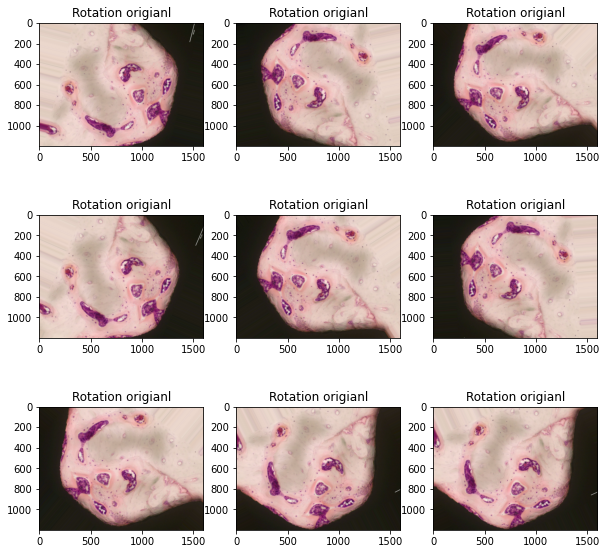

(1200, 1600, 3)


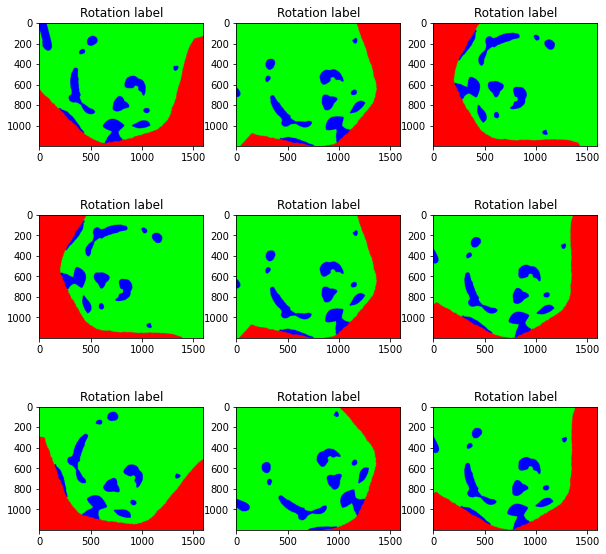

In [99]:
rotation(original_img, lable_img)

-------------------------Random shifts-------------------------
(1200, 1600, 3)


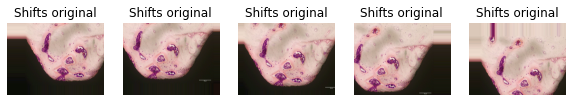

(1200, 1600, 3)


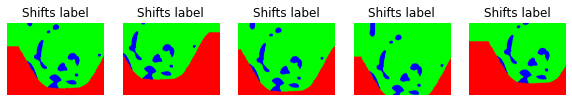

In [100]:
shifts(original_img, lable_img)

-------------------------Random flips-------------------------
(1200, 1600, 3)


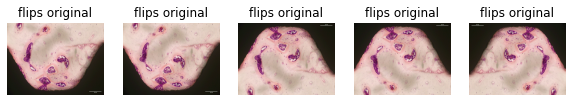

(1200, 1600, 3)


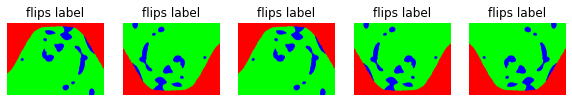

In [101]:
flips(original_img, lable_img)

-------------------------Random Brightness-------------------------
(1200, 1600, 3)


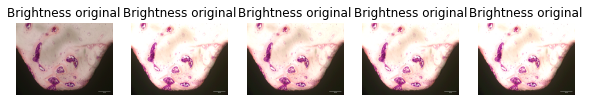

(1200, 1600, 3)


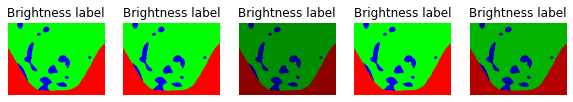

In [102]:
Brightness(original_img, lable_img)

-------------------------Random zoom-------------------------
(1200, 1600, 3)


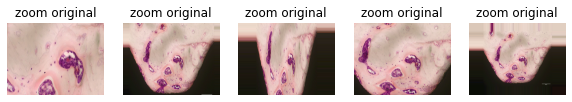

(1200, 1600, 3)


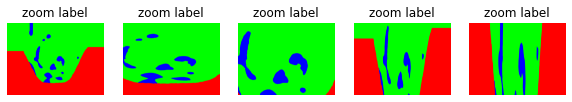

In [103]:
zoom(original_img, lable_img)

# 5. 패치